In [41]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

## basic data visualizations :o

In [42]:
# downloading the dataset 
df = pd.read_csv('complete_dataset.csv')
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
# df = df[df['date'].apply(lambda x: x.year)==2019].reset_index(drop=True)

In [43]:
df['school_day'] = df['school_day'].apply(lambda x: 1 if x == 'Y' else 0)
df['holiday'] = df['holiday'].apply(lambda x: 1 if x == 'Y' else 0)

In [44]:
# variable names
df.columns

Index(['date', 'demand', 'RRP', 'demand_pos_RRP', 'RRP_positive',
       'demand_neg_RRP', 'RRP_negative', 'frac_at_neg_RRP', 'min_temperature',
       'max_temperature', 'solar_exposure', 'rainfall', 'school_day',
       'holiday'],
      dtype='object')

Text(0.5, 0, 'Demand')

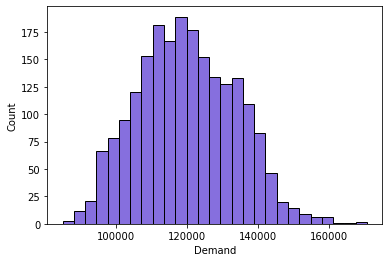

In [45]:
sns.histplot(data=df['demand'], color='#5D3FD3')
plt.xlabel('Demand')

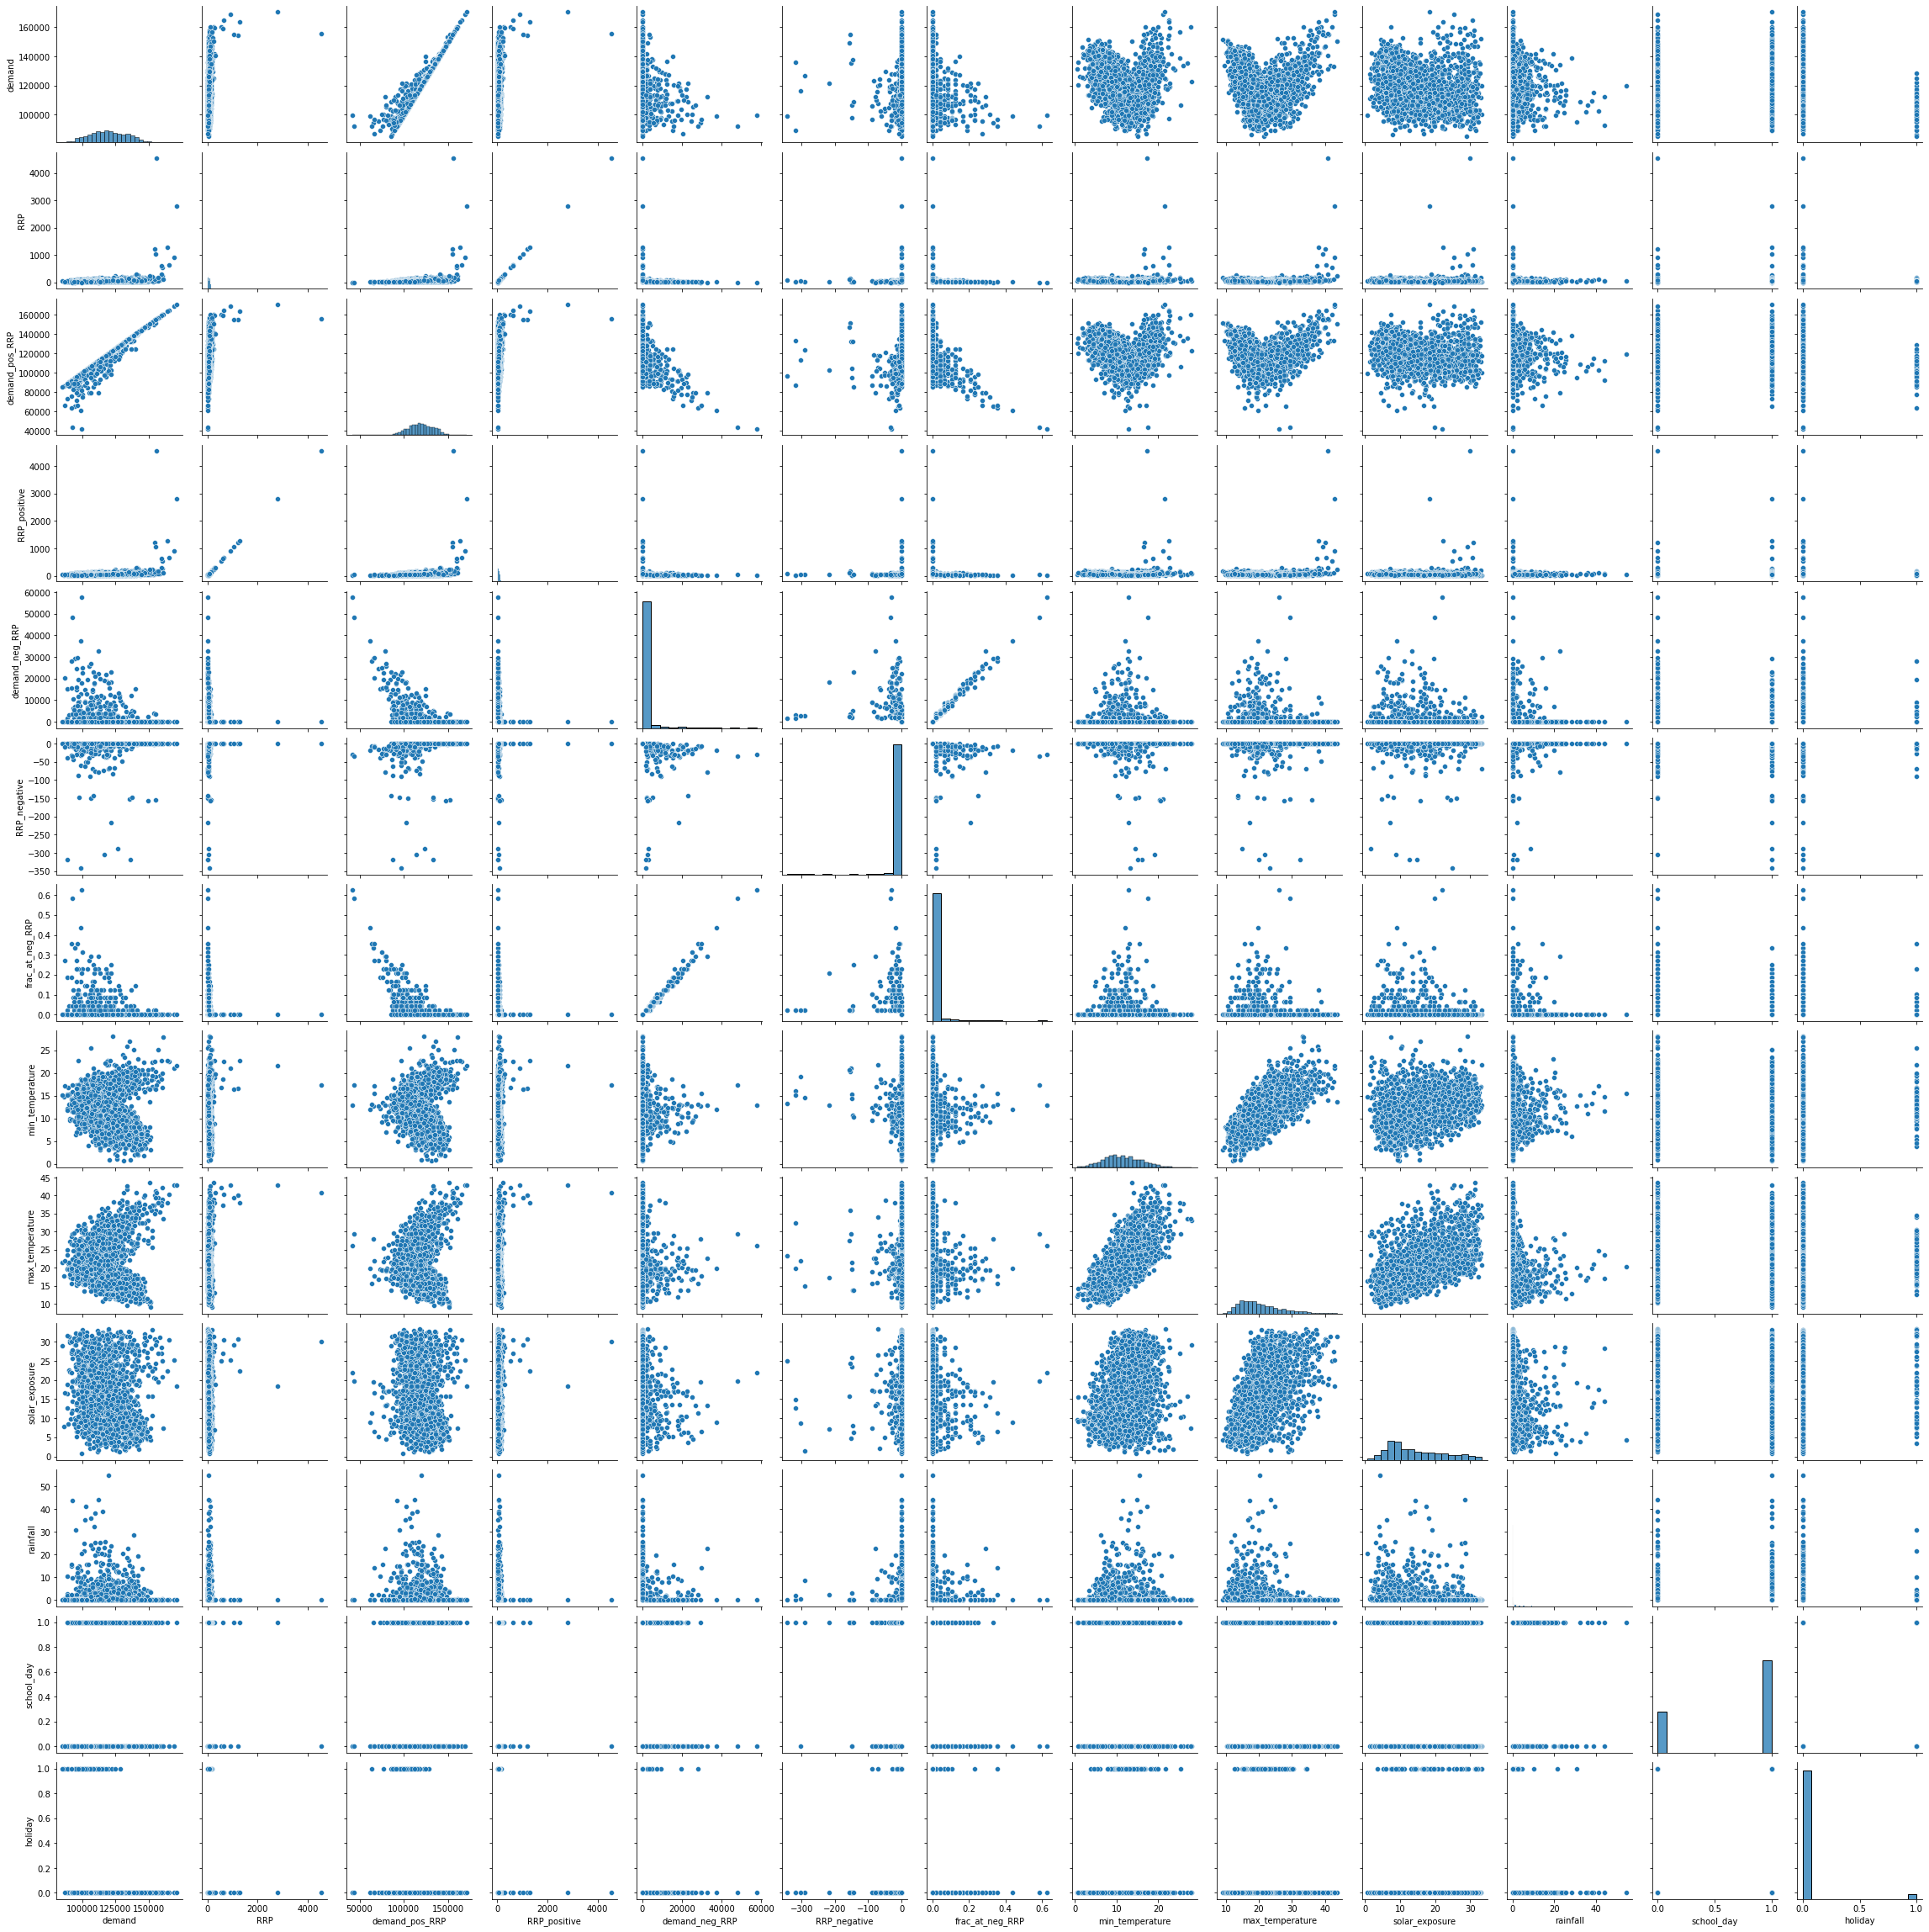

In [46]:
sns.pairplot(df)

Text(0, 0.5, 'Demand')

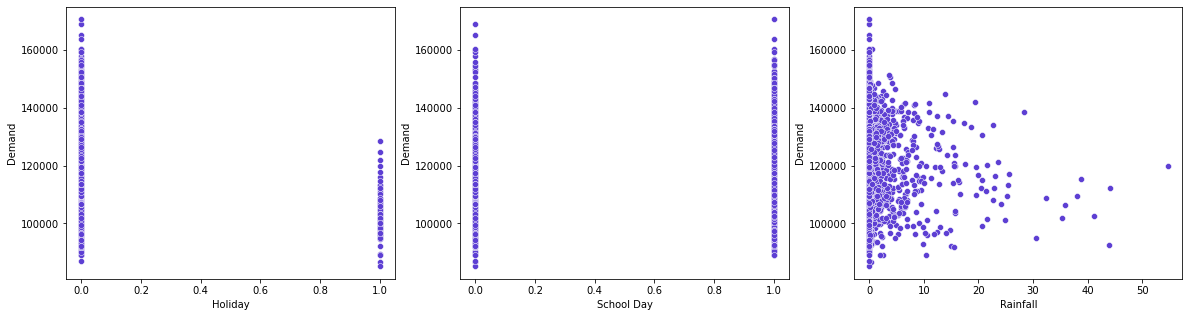

In [47]:
fig = plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='holiday', y='demand', data=df, color='#5D3FD3')
plt.xlabel('Holiday')
plt.ylabel('Demand')

plt.subplot(1, 3, 2)
sns.scatterplot(x='school_day', y='demand', data=df, color='#5D3FD3')
plt.xlabel('School Day')
plt.ylabel('Demand')

plt.subplot(1, 3, 3)
sns.scatterplot(x='rainfall', y='demand', data=df, color='#5D3FD3')
plt.xlabel('Rainfall')
plt.ylabel('Demand')

Text(0, 0.5, 'Demand')

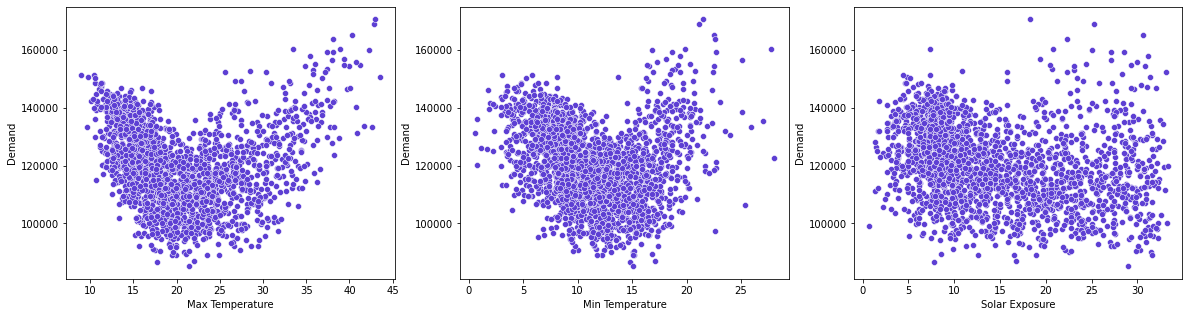

In [48]:
fig = plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='max_temperature', y='demand', data=df, color='#5D3FD3')
plt.xlabel('Max Temperature')
plt.ylabel('Demand')

plt.subplot(1, 3, 2)
sns.scatterplot(x='min_temperature', y='demand', data=df, color='#5D3FD3')
plt.xlabel('Min Temperature')
plt.ylabel('Demand')

plt.subplot(1, 3, 3)
sns.scatterplot(x='solar_exposure', y='demand', data=df, color='#5D3FD3')
plt.xlabel('Solar Exposure')
plt.ylabel('Demand')

In [49]:
print(df['max_temperature'].isnull().sum())
print(df['solar_exposure'].isnull().sum())

0
1


## building MLR

In [50]:
# model1 : multiple linear regression with max temp, min temp, solar exposure, and holiday
ols_object = smf.ols(formula = 'demand~max_temperature+min_temperature+solar_exposure+school_day+holiday+rainfall', data = df)
model1 = ols_object.fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     69.28
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           7.03e-79
Time:                        19:11:50   Log-Likelihood:                -22821.
No. Observations:                2102   AIC:                         4.566e+04
Df Residuals:                    2095   BIC:                         4.570e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.234e+05   1095.862    1

Text(0, 0.5, 'Residuals')

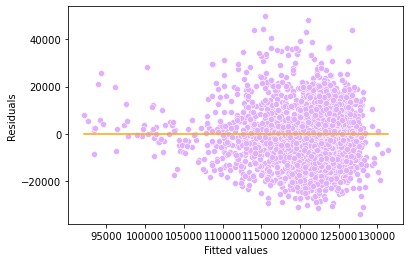

In [51]:
sns.scatterplot(x=model1.fittedvalues, y=model1.resid, color = '#E0B0FF')
sns.lineplot(x=[model1.fittedvalues.min(), model1.fittedvalues.max()], y=[0,0], color='orange')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

Text(0, 0.5, 'Residuals')

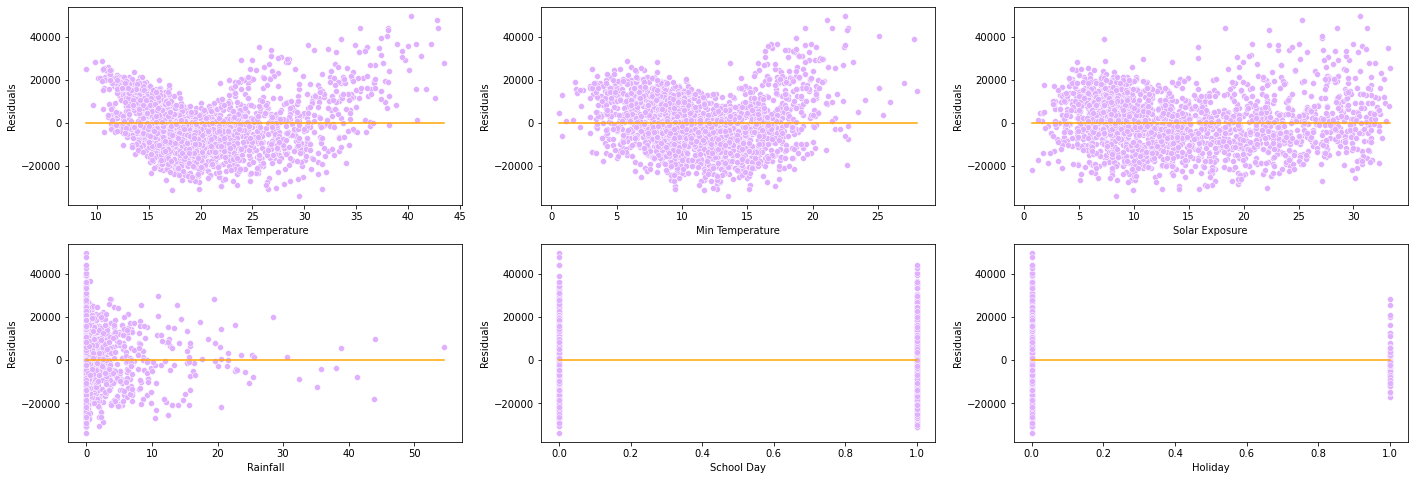

In [52]:
fig = plt.figure(figsize=(24, 8))
plt.subplot(2, 3, 1)
sns.scatterplot(x=df.max_temperature, y=model1.resid, color = '#E0B0FF')
sns.lineplot(x=[df.max_temperature.min(), df.max_temperature.max()], y=[0,0], color='orange')
plt.xlabel('Max Temperature')
plt.ylabel('Residuals')

plt.subplot(2, 3, 2)
sns.scatterplot(x=df.min_temperature, y=model1.resid, color = '#E0B0FF')
sns.lineplot(x=[df.min_temperature.min(), df.min_temperature.max()], y=[0,0], color='orange')
plt.xlabel('Min Temperature')
plt.ylabel('Residuals')

plt.subplot(2, 3, 3)
sns.scatterplot(x=df.solar_exposure, y=model1.resid, color = '#E0B0FF')
sns.lineplot(x=[df.solar_exposure.min(), df.solar_exposure.max()], y=[0,0], color='orange')
plt.xlabel('Solar Exposure')
plt.ylabel('Residuals')

plt.subplot(2, 3, 4)
sns.scatterplot(x=df.rainfall, y=model1.resid, color = '#E0B0FF')
sns.lineplot(x=[df.rainfall.min(), df.rainfall.max()], y=[0,0], color='orange')
plt.xlabel('Rainfall')
plt.ylabel('Residuals')

plt.subplot(2, 3, 5)
sns.scatterplot(x=df.school_day, y=model1.resid, color = '#E0B0FF')
sns.lineplot(x=[df.school_day.min(), df.school_day.max()], y=[0,0], color='orange')
plt.xlabel('School Day')
plt.ylabel('Residuals')

plt.subplot(2, 3, 6)
sns.scatterplot(x=df.holiday, y=model1.resid, color = '#E0B0FF')
sns.lineplot(x=[df.holiday.min(), df.holiday.max()], y=[0,0], color='orange')
plt.xlabel('Holiday')
plt.ylabel('Residuals')

### model1 conclusions:
- y heteroscedastic
- max temperature quadratic
- min temperature quadratic

In [53]:
# model2 : np.log(y) to resovle heterscedasticity
ols_object = smf.ols(formula = 'np.log(demand)~max_temperature+I(max_temperature**2)+min_temperature+I(min_temperature**2)+solar_exposure+I(solar_exposure**2)+school_day+holiday+rainfall', data = df)
model2 = ols_object.fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:         np.log(demand)   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     222.0
Date:                Wed, 01 Mar 2023   Prob (F-statistic):          7.10e-297
Time:                        19:11:51   Log-Likelihood:                 2270.5
No. Observations:                2102   AIC:                            -4521.
Df Residuals:                    2092   BIC:                            -4465.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

Text(0, 0.5, 'Residuals')

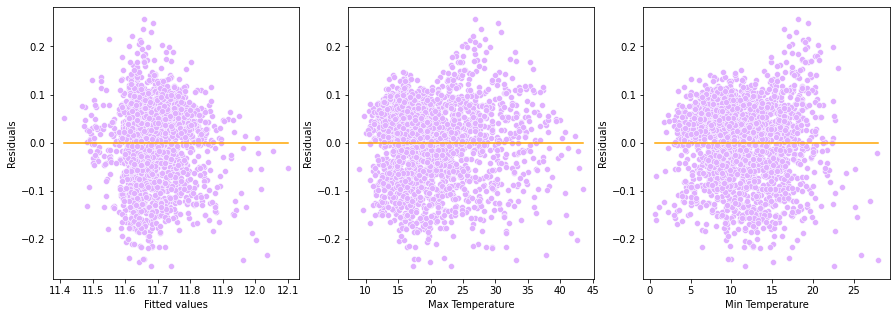

In [54]:
fig = plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x=model2.fittedvalues, y=model2.resid, color = '#E0B0FF')
sns.lineplot(x=[model2.fittedvalues.min(), model2.fittedvalues.max()], y=[0,0], color='orange')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

plt.subplot(1, 3, 2)
sns.scatterplot(x=df.max_temperature, y=model2.resid, color = '#E0B0FF')
sns.lineplot(x=[df.max_temperature.min(), df.max_temperature.max()], y=[0,0], color='orange')
plt.xlabel('Max Temperature')
plt.ylabel('Residuals')

plt.subplot(1, 3, 3)
sns.scatterplot(x=df.min_temperature, y=model2.resid, color = '#E0B0FF')
sns.lineplot(x=[df.min_temperature.min(), df.min_temperature.max()], y=[0,0], color='orange')
plt.xlabel('Min Temperature')
plt.ylabel('Residuals')

Text(0, 0.5, 'Residuals')

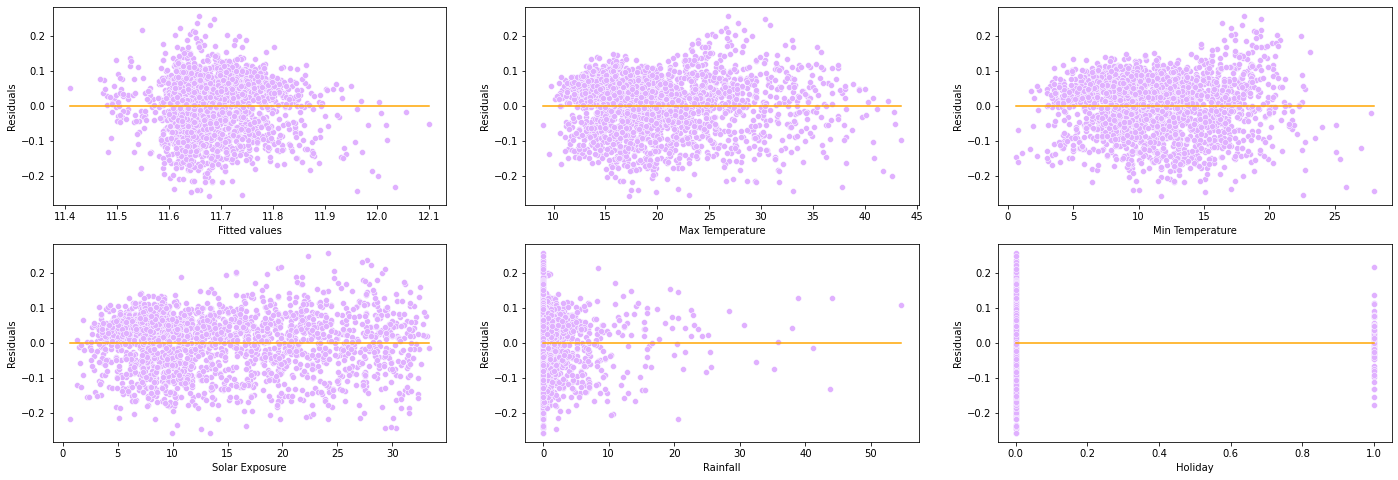

In [55]:
fig = plt.figure(figsize=(24, 8))
plt.subplot(2, 3, 1)
sns.scatterplot(x=model2.fittedvalues, y=model2.resid, color = '#E0B0FF')
sns.lineplot(x=[model2.fittedvalues.min(), model2.fittedvalues.max()], y=[0,0], color='orange')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

plt.subplot(2, 3, 2)
sns.scatterplot(x=df.max_temperature, y=model2.resid, color = '#E0B0FF')
sns.lineplot(x=[df.max_temperature.min(), df.max_temperature.max()], y=[0,0], color='orange')
plt.xlabel('Max Temperature')
plt.ylabel('Residuals')

plt.subplot(2, 3, 3)
sns.scatterplot(x=df.min_temperature, y=model2.resid, color = '#E0B0FF')
sns.lineplot(x=[df.min_temperature.min(), df.min_temperature.max()], y=[0,0], color='orange')
plt.xlabel('Min Temperature')
plt.ylabel('Residuals')

plt.subplot(2, 3, 4)
sns.scatterplot(x=df.solar_exposure, y=model2.resid, color = '#E0B0FF')
sns.lineplot(x=[df.solar_exposure.min(), df.solar_exposure.max()], y=[0,0], color='orange')
plt.xlabel('Solar Exposure')
plt.ylabel('Residuals')

plt.subplot(2, 3, 5)
sns.scatterplot(x=df.rainfall, y=model2.resid, color = '#E0B0FF')
sns.lineplot(x=[df.rainfall.min(), df.rainfall.max()], y=[0,0], color='orange')
plt.xlabel('Rainfall')
plt.ylabel('Residuals')

plt.subplot(2, 3, 6)
sns.scatterplot(x=df.holiday, y=model2.resid, color = '#E0B0FF')
sns.lineplot(x=[df.holiday.min(), df.holiday.max()], y=[0,0], color='orange')
plt.xlabel('Holiday')
plt.ylabel('Residuals')

### model 2 conclusions: 
- R-squared significantly better
- residual plots indicate that linear assumptions have been satisfied

## autocorrelation

Text(0, 0.5, 'Demand')

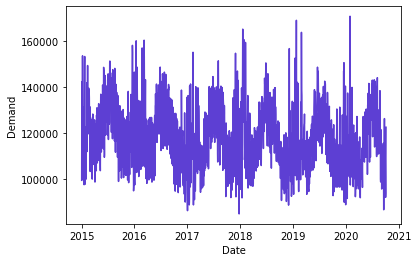

In [56]:
sns.lineplot(x='date', y='demand', data=df, color = '#5D3FD3')
plt.xlabel('Date')
plt.ylabel('Demand')

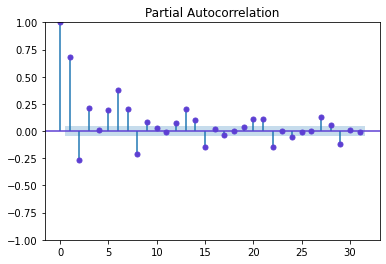

In [57]:
sm.graphics.tsa.plot_pacf(df.demand.squeeze(), lags=31, method="ywm", color = '#5D3FD3')
plt.show()
# conclusion(s): significant spike at a lag of 1

In [58]:
# functions for autocorrelation
import numpy.ma as ma
from scipy.stats.stats import pearsonr, normaltest
from scipy.spatial.distance import correlation

def build_model(features):
    X=sm.add_constant(df[df['date']<date][features])
    y=df[df['date']<date]['demand']
    model = sm.OLS(y, X, missing='drop').fit()
    predictions = model.predict(X)
    res = y-predictions
    return model, res

def plt_residual(res):
    plt.plot(range(len(res)), res, color = '#5D3FD3') 
    plt.ylabel('Residual')
    plt.xlabel('Day')

def plt_residual_lag(res, nlag):
    x=res.values
    y=res.shift(nlag).values
    sns.kdeplot(x,y=y,color='blue',shade=True )
    plt.xlabel('res')
    plt.ylabel("res-lag-{}".format(nlag))
    rho,p=corrcoef(x,y)
    plt.title("n_lag={} hours, correlation={:f}".format(nlag, rho))
    
def plt_acf(res):
    plt.rcParams['figure.figsize'] = [18, 5]
    acorr = sm.tsa.acf(res.dropna(), nlags = len(res.dropna())-1)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.plot(acorr)
    ax1.set_ylabel('corr')
    ax1.set_xlabel('n_lag')
    ax1.set_title('Auto Correlation')
    ax2.plot(acorr[:4*7])
    ax2.set_ylabel('corr')
    ax2.set_xlabel('n_lag')
    ax2.set_title('Auto Correlation (4-week zoomed in) ')
    plt.show()
    pd.set_option('display.max_columns', None)
    adf=pd.DataFrame(np.round(acorr[:30], 2).reshape([30, 1] ))
    adf.index.name='day'
    display(adf)
    plt.rcParams['figure.figsize'] = [9, 5]

def corrcoef(x,y):
    a,b=ma.masked_invalid(x),ma.masked_invalid(y)
    msk = (~a.mask & ~b.mask)
    return pearsonr(x[msk],y[msk])[0], normaltest(res, nan_policy='omit')[1]

In [59]:
df['demand'] = np.log(df['demand'])
df['max_temperature_squared'] = (df['max_temperature'])**2
df['min_temperature_squared'] = (df['min_temperature'])**2
df['solar_exposure_squared'] = (df['solar_exposure'])**2

In [60]:
df.at[df[df['solar_exposure'].isna()].index[0], 'solar_exposure'] = 0

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = df[['max_temperature', 'max_temperature_squared', 'min_temperature', 'min_temperature_squared', 'solar_exposure', 'holiday']]
X = add_constant(X)
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns

for i in range(len(X.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

print(vif_data)

                   feature         VIF
0                    const  125.847443
1          max_temperature   48.721772
2  max_temperature_squared   42.575362
3          min_temperature   23.195049
4  min_temperature_squared   22.360798
5           solar_exposure    1.663559
6                  holiday    1.012090


### vif conclusions:
- max_temperature, max_temperature_squared, min_temperature, and min_temperature_squared have high vif — makes sense since _temperature_squared was dervied from _temperature

Text(0, 0.5, 'Studentized Residuals')

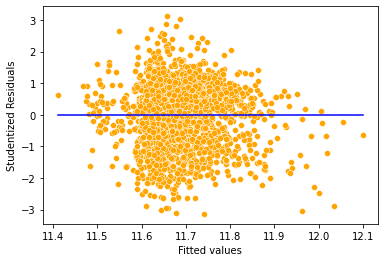

In [62]:
out = model2.outlier_test()

sns.scatterplot(x = (model2.fittedvalues), y=(out.student_resid),color = 'orange')
sns.lineplot(x = [model2.fittedvalues.min(), model2.fittedvalues.max()], y = [0,0], color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Studentized Residuals')

In [63]:
np.sum((np.abs(out.student_resid)>3))

6

In [64]:
from datetime import date, timedelta

sdate = date(2019,1,1)
edate = date(2020,1,1)
all_dates = pd.date_range(sdate, edate-timedelta(days=1), freq='d')

In [65]:
all_dates

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [66]:
predictions1 = pd.DataFrame()
sse = 0
for date in all_dates:
    model, residuals = build_model(['max_temperature', 'max_temperature_squared', 'min_temperature', 'min_temperature_squared', 'solar_exposure', 'solar_exposure_squared', 'school_day','holiday', 'rainfall'])
    subset = df[df['date'] == date]
    temp = model.predict(sm.add_constant(subset[['max_temperature', 'max_temperature_squared', 'min_temperature', 'min_temperature_squared', 'solar_exposure', 'solar_exposure_squared', 'school_day','holiday', 'rainfall']], has_constant='add'))
    sse += ((np.exp(subset['demand']) - np.exp(temp.values))**2).sum()
    predictions1 = pd.concat([predictions1, temp]) 

In [67]:
model, residuals = build_model(['max_temperature', 'max_temperature_squared', 'min_temperature', 'min_temperature_squared', 'solar_exposure', 'solar_exposure_squared', 'school_day','holiday', 'rainfall'])

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     183.5
Date:                Wed, 01 Mar 2023   Prob (F-statistic):          1.81e-247
Time:                        19:11:59   Log-Likelihood:                 1956.3
No. Observations:                1821   AIC:                            -3893.
Df Residuals:                    1811   BIC:                            -3838.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

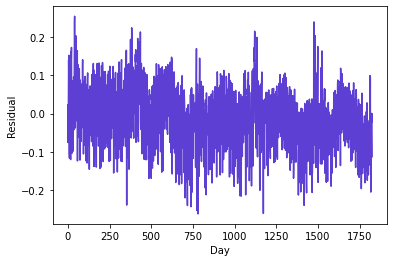

In [68]:
print(model.summary())
plt_residual(residuals)  

Text(0, 0.5, 'Predicted Demand')

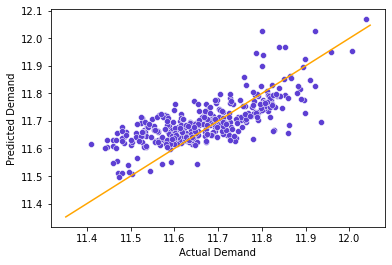

In [69]:
sns.scatterplot(x=df['demand'], y=predictions1[0], color = '#5D3FD3')
x_var = np.linspace(min(df['demand']), max(df['demand']))
y_var = x_var
plt.plot(x_var, y_var, color='orange')
plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand')

In [70]:
np.sqrt(sse/365)

9470.614262719202

In [88]:
df['demand_lag_1_day']=df['demand'].shift(1)

predictions2 = pd.DataFrame()
sse = 0
for date in all_dates:
    model, residuals = build_model(['max_temperature', 'max_temperature_squared', 'min_temperature', 'min_temperature_squared', 'solar_exposure','solar_exposure_squared', 'school_day','holiday', 'rainfall', 'demand_lag_1_day'])
    subset = df[df['date'] == date]
    temp = model.predict(sm.add_constant(subset[['max_temperature', 'max_temperature_squared', 'min_temperature', 'min_temperature_squared', 'solar_exposure', 'solar_exposure_squared','school_day','holiday', 'rainfall', 'demand_lag_1_day']], has_constant='add'))
    sse += ((np.exp(subset['demand']) - np.exp(temp.values))**2).sum()
    predictions2 = pd.concat([predictions2, temp]) 

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     231.9
Date:                Wed, 01 Mar 2023   Prob (F-statistic):          6.46e-292
Time:                        19:14:56   Log-Likelihood:                 1800.7
No. Observations:                1456   AIC:                            -3579.
Df Residuals:                    1445   BIC:                            -3521.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

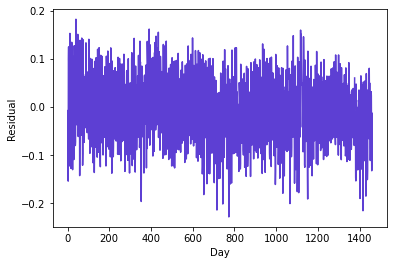

In [85]:
model, residuals = build_model(['max_temperature', 'max_temperature_squared', 'min_temperature', 'min_temperature_squared', 'solar_exposure','solar_exposure_squared', 'school_day','holiday', 'rainfall', 'demand_lag_1_day'])
print(model.summary())
plt_residual(residuals)  

Text(0, 0.5, 'Predicted Demand')

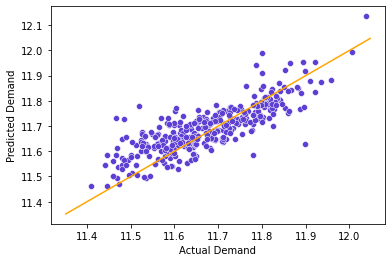

In [86]:
sns.scatterplot(x=df['demand'], y=predictions2[0], color = '#5D3FD3')
x_var = np.linspace(min(df['demand']), max(df['demand']))
y_var = x_var
plt.plot(x_var, y_var, color='orange')
plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand')

In [89]:
np.sqrt(sse/365)

8177.142361716478

In [90]:
df['demand_lag_2_day']=df['demand'].shift(2)

predictions2 = pd.DataFrame()
sse = 0
for date in all_dates:
    model, residuals = build_model(['max_temperature', 'max_temperature_squared', 'min_temperature', 'min_temperature_squared', 'solar_exposure','solar_exposure_squared', 'school_day','holiday', 'rainfall', 'demand_lag_1_day', 'demand_lag_2_day'])
    subset = df[df['date'] == date]
    temp = model.predict(sm.add_constant(subset[['max_temperature', 'max_temperature_squared', 'min_temperature', 'min_temperature_squared', 'solar_exposure','solar_exposure_squared', 'school_day','holiday', 'rainfall', 'demand_lag_1_day', 'demand_lag_2_day']], has_constant='add'))
    sse += ((np.exp(subset['demand']) - np.exp(temp.values))**2).sum()
    predictions2 = pd.concat([predictions2, temp]) 

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     322.3
Date:                Wed, 01 Mar 2023   Prob (F-statistic):               0.00
Time:                        19:15:59   Log-Likelihood:                 2352.7
No. Observations:                1819   AIC:                            -4681.
Df Residuals:                    1807   BIC:                            -4615.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

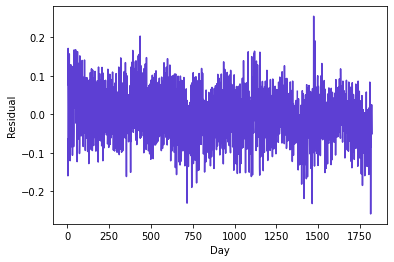

In [91]:
model, residuals = build_model(['max_temperature', 'max_temperature_squared', 'min_temperature', 'min_temperature_squared', 'solar_exposure','solar_exposure_squared', 'school_day','holiday', 'rainfall', 'demand_lag_1_day', 'demand_lag_2_day'])
print(model.summary())
plt_residual(residuals)  

Text(0, 0.5, 'Predicted Demand')

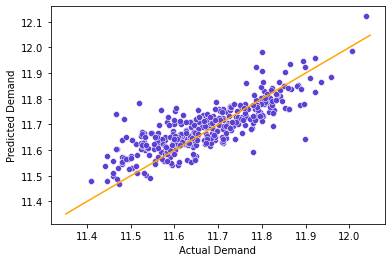

In [92]:
sns.scatterplot(x=df['demand'], y=predictions2[0], color = '#5D3FD3')
x_var = np.linspace(min(df['demand']), max(df['demand']))
y_var = x_var
plt.plot(x_var, y_var, color='orange')
plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand')

In [93]:
np.sqrt(sse/365)

7956.16823712591

# CHECK

In [97]:
df['demand']

0       11.509269
1       11.772254
2       11.865697
3       11.555321
4       11.679560
          ...    
2101    11.508775
2102    11.432550
2103    11.451917
2104    11.640527
2105    11.716744
Name: demand, Length: 2106, dtype: float64

In [79]:
df['demand_lag_1_week']=df['demand'].shift(7)

predictions3 = pd.DataFrame()
sse = 0
for date in all_dates:
    model, residuals = build_model(['max_temperature', 'max_temperature_squared', 'min_temperature', 'min_temperature_squared', 'solar_exposure', 'school_day', 'holiday', 'rainfall','demand_lag_1_day', 'demand_lag_1_week'])
    subset = df[df['date'] == date]
    temp = model2.predict(sm.add_constant(subset[['max_temperature', 'max_temperature_squared', 'min_temperature', 'min_temperature_squared', 'solar_exposure', 'school_day', 'holiday', 'rainfall', 'demand_lag_1_day', 'demand_lag_1_week']], has_constant='add'))
    sse += ((np.exp(subset['demand']) - np.exp(temp.values))**2).sum()
    predictions3 = pd.concat([predictions3, temp]) 

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     634.6
Date:                Wed, 01 Mar 2023   Prob (F-statistic):               0.00
Time:                        19:12:17   Log-Likelihood:                 2581.6
No. Observations:                1818   AIC:                            -5145.
Df Residuals:                    1809   BIC:                            -5096.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

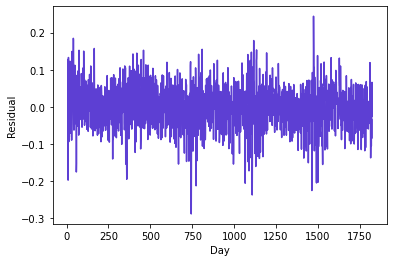

In [80]:
model, residuals = build_model(['max_temperature', 'max_temperature_squared', 'min_temperature', 'min_temperature_squared', 'solar_exposure', 'holiday', 'demand_lag_1_day', 'demand_lag_1_week'])
print(model.summary())
plt_residual(residuals)

Text(0, 0.5, 'Predicted Power')

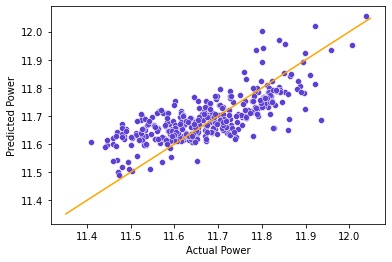

In [81]:
sns.scatterplot(x=df['demand'], y=predictions3[0], color = '#5D3FD3')
x_var = np.linspace(min(df['demand']), max(df['demand']))
y_var = x_var
plt.plot(x_var, y_var, color='orange')
plt.xlabel('Actual Power')
plt.ylabel('Predicted Power')

In [82]:
np.sqrt(sse/365)

9222.98076577886

In [83]:
df['demand_lag_2_week']=df['demand'].shift(14)

predictions4 = pd.DataFrame()
sse = 0
for date in all_dates:
    model, residuals = build_model(['max_temperature', 'max_temperature_squared', 'min_temperature', 'min_temperature_squared', 'solar_exposure', 'holiday', 'demand_lag_1_day', 'demand_lag_1_week', 'demand_lag_2_week'])
    subset = df[df['date'] == date]
    temp = model2.predict(sm.add_constant(subset[['max_temperature', 'max_temperature_squared', 'min_temperature', 'min_temperature_squared', 'solar_exposure', 'holiday', 'demand_lag_1_day', 'demand_lag_1_week', 'demand_lag_2_week']], has_constant='add'))
    sse += ((np.exp(subset['demand']) - np.exp(temp.values))**2).sum()
    predictions4 = pd.concat([predictions4, temp]) 

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: NameError: name 'school_day' is not defined
    np.log(demand)~max_temperature+I(max_temperature**2)+min_temperature+I(min_temperature**2)+solar_exposure+I(solar_exposure**2)+school_day+holiday+rainfall
                                                                                                                                   ^^^^^^^^^^

In [ ]:
model, residuals = build_model(['max_temperature', 'max_temperature_squared', 'min_temperature', 'min_temperature_squared', 'solar_exposure', 'holiday', 'demand_lag_1_day', 'demand_lag_1_week', 'demand_lag_2_week'])
print(model.summary())
plt_residual(residuals)

In [ ]:
sns.scatterplot(x=df['demand'], y=predictions4[0], color = 'orange')
x_var = np.linspace(min(df['demand']), max(df['demand']))
y_var = x_var
plt.plot(x_var, y_var)
plt.xlabel('Actual Power')
plt.ylabel('Predicted Power')

In [ ]:
np.sqrt(sse/365)